## Data quality report

### Import required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

### Read csv file
In order to perform our activities on the dataset, we need to convert csv file into a dataframe object using Pandas.

N.B.: in case the original categorical data has some space character in front of the value, we eliminate it with an extra parameter.

In [2]:
df = pd.read_csv('CreditRisk-18202941.csv', keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)

### First glance at the dataset

In [3]:
print("The dataset has %s rows and %s columns." % df.shape)

The dataset has 1000 rows and 24 columns.


We examine the first 5 rows of our dataset:

In [4]:
df.head(5)

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Bad,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
1,Good,71,308,7,104,39,0,0,98,73,...,30,0,0,0,75,99,11,1,5,81
2,Good,75,381,15,108,20,0,0,95,14,...,45,1,2,2,32,64,6,4,3,77
3,Bad,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
4,Bad,58,216,12,86,23,0,0,88,3,...,29,1,1,1,84,-8,7,1,5,75


And now the last 5 rows:

In [5]:
df.tail(5)

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
995,Good,89,193,9,114,13,0,0,100,-7,...,43,0,0,0,1,88,2,2,0,67
996,Good,89,353,40,140,19,0,0,100,-7,...,11,0,0,0,7,-8,3,1,0,36
997,Good,78,188,3,72,20,1,1,96,45,...,43,0,2,2,1,91,1,5,0,43
998,Bad,63,291,9,88,25,0,0,84,3,...,32,0,0,0,30,73,7,2,1,82
999,Bad,61,250,4,66,47,1,1,100,-7,...,39,0,2,2,73,61,14,4,5,90


### Examining the features

#### Types and conversions
First of all, we list all the features in the dataset with their types.

In [6]:
df.dtypes

RiskPerformance                       object
ExternalRiskEstimate                   int64
MSinceOldestTradeOpen                  int64
MSinceMostRecentTradeOpen              int64
AverageMInFile                         int64
NumSatisfactoryTrades                  int64
NumTrades60Ever2DerogPubRec            int64
NumTrades90Ever2DerogPubRec            int64
PercentTradesNeverDelq                 int64
MSinceMostRecentDelq                   int64
MaxDelq2PublicRecLast12M               int64
MaxDelqEver                            int64
NumTotalTrades                         int64
NumTradesOpeninLast12M                 int64
PercentInstallTrades                   int64
MSinceMostRecentInqexcl7days           int64
NumInqLast6M                           int64
NumInqLast6Mexcl7days                  int64
NetFractionRevolvingBurden             int64
NetFractionInstallBurden               int64
NumRevolvingTradesWBalance             int64
NumInstallTradesWBalance               int64
NumBank2Na

After having imported and examined the CSV file in a spreadsheet, we decided to make the following type conversions:

- **RiskPerformance** feature (i.e. our target feature) is converted to **categorical**, as it is a binary variable showing only two values: 'good' and 'bad'.
- **MaxDelq2PublicRecLast12M** and **MaxDelqEver** features are converted to **categorical** as they contain finite set of possible values. This is an evidence from the Data Dictionary spreadsheet.
- **PercentTradesNeverDelq** feature is converted to **floating-point** since its values are percentages.
- **NetFractionRevolvingBurden** feature is converted to **floating-point** since it represents a fraction between two numbers.
- **NetFractionInstallBurden** feature is converted to **floating-point** since it represents a fraction between two numbers.
- **PercentTradesWBalance** feature is converted to **floating-point** since its values are percentages.

In [7]:
# Select columns containing categorical data
categorical_columns = df[['RiskPerformance','MaxDelq2PublicRecLast12M','MaxDelqEver']].columns

# Convert data type to category for these columns
for column in categorical_columns:
    df[column] = df[column].astype('category')

# Select columns containing ratio or percentage data
float_columns = df[['PercentTradesNeverDelq','NetFractionRevolvingBurden','NetFractionInstallBurden','PercentTradesWBalance']].columns

# Convert data type to float for these columns
for column in float_columns:
    df[column] = df[column].astype('float')

continuous_columns = df.select_dtypes(['float64', 'int64'])

# Show feature data types again to check that conversion was successful
df.dtypes

RiskPerformance                       category
ExternalRiskEstimate                     int64
MSinceOldestTradeOpen                    int64
MSinceMostRecentTradeOpen                int64
AverageMInFile                           int64
NumSatisfactoryTrades                    int64
NumTrades60Ever2DerogPubRec              int64
NumTrades90Ever2DerogPubRec              int64
PercentTradesNeverDelq                 float64
MSinceMostRecentDelq                     int64
MaxDelq2PublicRecLast12M              category
MaxDelqEver                           category
NumTotalTrades                           int64
NumTradesOpeninLast12M                   int64
PercentInstallTrades                     int64
MSinceMostRecentInqexcl7days             int64
NumInqLast6M                             int64
NumInqLast6Mexcl7days                    int64
NetFractionRevolvingBurden             float64
NetFractionInstallBurden               float64
NumRevolvingTradesWBalance               int64
NumInstallTra

#### Check for duplicates and constant columns
We need first to check for the presence of duplicated rows and/or columns in our dataset.

In [9]:
print('In our dataset there are:\n- %s duplicate rows\n- %s duplicate columns.' % \
      (df.duplicated()[df.duplicated() == True].shape[0],\
       df.columns.size - df.columns.unique().size))

In our dataset there are:
- 56 duplicate rows
- 0 duplicate columns.


After having assessed the presence of duplicates in rows, we proceed to drop them.

In [10]:
# The 'keep' and 'inplace' optional parameters are used in order to drop all the duplicates
# Otherwise the method would leave two rows with -9 values for all the features
# except for the target feature, as the two values are 'good' and 'bad'
df.drop_duplicates(keep = False, inplace = True)
print("The dataset has now %s rows and %s columns." % df.shape)

The dataset has now 942 rows and 24 columns.


Show the descriptive statistics for the categorical features:

In [11]:
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
RiskPerformance,942,2,Bad,490
MaxDelq2PublicRecLast12M,942,8,7,388
MaxDelqEver,942,7,8,416


In order to check for the presence of constant values in columns, we need to look at the descriptive statistics for the continuous features.

In [12]:
df.select_dtypes(['int64','float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
ExternalRiskEstimate,942.0,72.150743,10.039486,37.0,65.0,72.0,80.0,93.0
MSinceOldestTradeOpen,942.0,196.628450,101.707191,-8.0,134.0,183.5,252.0,528.0
MSinceMostRecentTradeOpen,942.0,9.325902,11.255838,0.0,3.0,6.0,12.0,145.0
AverageMInFile,942.0,78.936306,32.789643,5.0,58.0,75.5,98.0,256.0
NumSatisfactoryTrades,942.0,21.399151,11.398674,1.0,13.0,20.0,28.0,70.0
NumTrades60Ever2DerogPubRec,942.0,0.587049,1.202354,0.0,0.0,0.0,1.0,12.0
NumTrades90Ever2DerogPubRec,942.0,0.384289,0.905109,0.0,0.0,0.0,0.0,9.0
PercentTradesNeverDelq,942.0,91.898089,12.294483,0.0,88.0,97.0,100.0,100.0
MSinceMostRecentDelq,942.0,8.498938,20.495340,-8.0,-7.0,1.0,18.0,81.0
NumTotalTrades,942.0,23.289809,13.362273,0.0,14.0,21.0,31.0,85.0


Looking at the **standard deviation** dispersion indicator, we can see that it is not zero for all the continuous features in the dataset. Thus, there are no constant continuous features.

We can now write the updated and cleaned dataframe object to a new csv file, in order to proceed with the data quality report.

In [13]:
df.to_csv('CreditRisk-18202941_clean.csv', index = False)

# Import new csv in new dataframe object
df_clean = pd.read_csv('CreditRisk-18202941_clean.csv', keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)
# Show feature types in new/updated dataframe
df_clean.dtypes

RiskPerformance                        object
ExternalRiskEstimate                    int64
MSinceOldestTradeOpen                   int64
MSinceMostRecentTradeOpen               int64
AverageMInFile                          int64
NumSatisfactoryTrades                   int64
NumTrades60Ever2DerogPubRec             int64
NumTrades90Ever2DerogPubRec             int64
PercentTradesNeverDelq                float64
MSinceMostRecentDelq                    int64
MaxDelq2PublicRecLast12M                int64
MaxDelqEver                             int64
NumTotalTrades                          int64
NumTradesOpeninLast12M                  int64
PercentInstallTrades                    int64
MSinceMostRecentInqexcl7days            int64
NumInqLast6M                            int64
NumInqLast6Mexcl7days                   int64
NetFractionRevolvingBurden            float64
NetFractionInstallBurden              float64
NumRevolvingTradesWBalance              int64
NumInstallTradesWBalance          

In [14]:
# We need to re-convert former category types, as they become lost during write/read process

# Select columns containing categorical data
cat_columns = df_clean[['RiskPerformance','MaxDelq2PublicRecLast12M','MaxDelqEver']].columns

# Convert data type to category for these columns
for column in cat_columns:
    df_clean[column] = df_clean[column].astype('category')

# Show feature data types again to check that conversion was successful
df_clean.dtypes

RiskPerformance                       category
ExternalRiskEstimate                     int64
MSinceOldestTradeOpen                    int64
MSinceMostRecentTradeOpen                int64
AverageMInFile                           int64
NumSatisfactoryTrades                    int64
NumTrades60Ever2DerogPubRec              int64
NumTrades90Ever2DerogPubRec              int64
PercentTradesNeverDelq                 float64
MSinceMostRecentDelq                     int64
MaxDelq2PublicRecLast12M              category
MaxDelqEver                           category
NumTotalTrades                           int64
NumTradesOpeninLast12M                   int64
PercentInstallTrades                     int64
MSinceMostRecentInqexcl7days             int64
NumInqLast6M                             int64
NumInqLast6Mexcl7days                    int64
NetFractionRevolvingBurden             float64
NetFractionInstallBurden               float64
NumRevolvingTradesWBalance               int64
NumInstallTra

In [15]:
# Double check to see if the original dataframe is coherent with the updated one.
if (df.shape == df_clean.shape):
    print("DOUBLE CHECK PASSED: datasets are coherent.")
elif (df.shape[0] != df_clean.shape[0]):
    print("WARNING: rows are incoherent.")
elif (df.shape[1] != df_clean.shape[1]):
    print("WARNING: columns are incoherent.")
else:
    print("WARNING: incoherent datasets.")

DOUBLE CHECK PASSED: datasets are coherent.


In [16]:
# Select continuous columns
continuous_columns = df_clean[['ExternalRiskEstimate','MSinceOldestTradeOpen',
                               'MSinceMostRecentTradeOpen','AverageMInFile',
                               'NumSatisfactoryTrades','NumTrades60Ever2DerogPubRec',
                               'NumTrades90Ever2DerogPubRec','PercentTradesNeverDelq',
                               'MSinceMostRecentDelq','NumTotalTrades',
                               'NumTradesOpeninLast12M','PercentInstallTrades',
                               'MSinceMostRecentInqexcl7days','NumInqLast6M',
                               'NumInqLast6Mexcl7days','NetFractionRevolvingBurden',
                               'NetFractionInstallBurden','NumRevolvingTradesWBalance',
                               'NumInstallTradesWBalance','NumBank2NatlTradesWHighUtilization',
                               'PercentTradesWBalance',]].columns

# Select categorical columns
categorical_columns = df_clean[['RiskPerformance','MaxDelq2PublicRecLast12M','MaxDelqEver']].columns

### Descriptive statistics tables

Generate descriptive statistics table for categorical features:

In [17]:
df_clean.select_dtypes(['category']).describe().T

,count,unique,top,freq
RiskPerformance,942,2,Bad,490
MaxDelq2PublicRecLast12M,942,8,7,388
MaxDelqEver,942,7,8,416


Generate descriptive statistics table for continuous features:

In [18]:
df_clean.select_dtypes(['int64','float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
ExternalRiskEstimate,942.0,72.150743,10.039486,37.0,65.0,72.0,80.0,93.0
MSinceOldestTradeOpen,942.0,196.628450,101.707191,-8.0,134.0,183.5,252.0,528.0
MSinceMostRecentTradeOpen,942.0,9.325902,11.255838,0.0,3.0,6.0,12.0,145.0
AverageMInFile,942.0,78.936306,32.789643,5.0,58.0,75.5,98.0,256.0
NumSatisfactoryTrades,942.0,21.399151,11.398674,1.0,13.0,20.0,28.0,70.0
NumTrades60Ever2DerogPubRec,942.0,0.587049,1.202354,0.0,0.0,0.0,1.0,12.0
NumTrades90Ever2DerogPubRec,942.0,0.384289,0.905109,0.0,0.0,0.0,0.0,9.0
PercentTradesNeverDelq,942.0,91.898089,12.294483,0.0,88.0,97.0,100.0,100.0
MSinceMostRecentDelq,942.0,8.498938,20.495340,-8.0,-7.0,1.0,18.0,81.0
NumTotalTrades,942.0,23.289809,13.362273,0.0,14.0,21.0,31.0,85.0


### Plots

#### Continuous features

For continuous features we build two different kinds of plots and save to pdf files:
- histograms
- box-plots

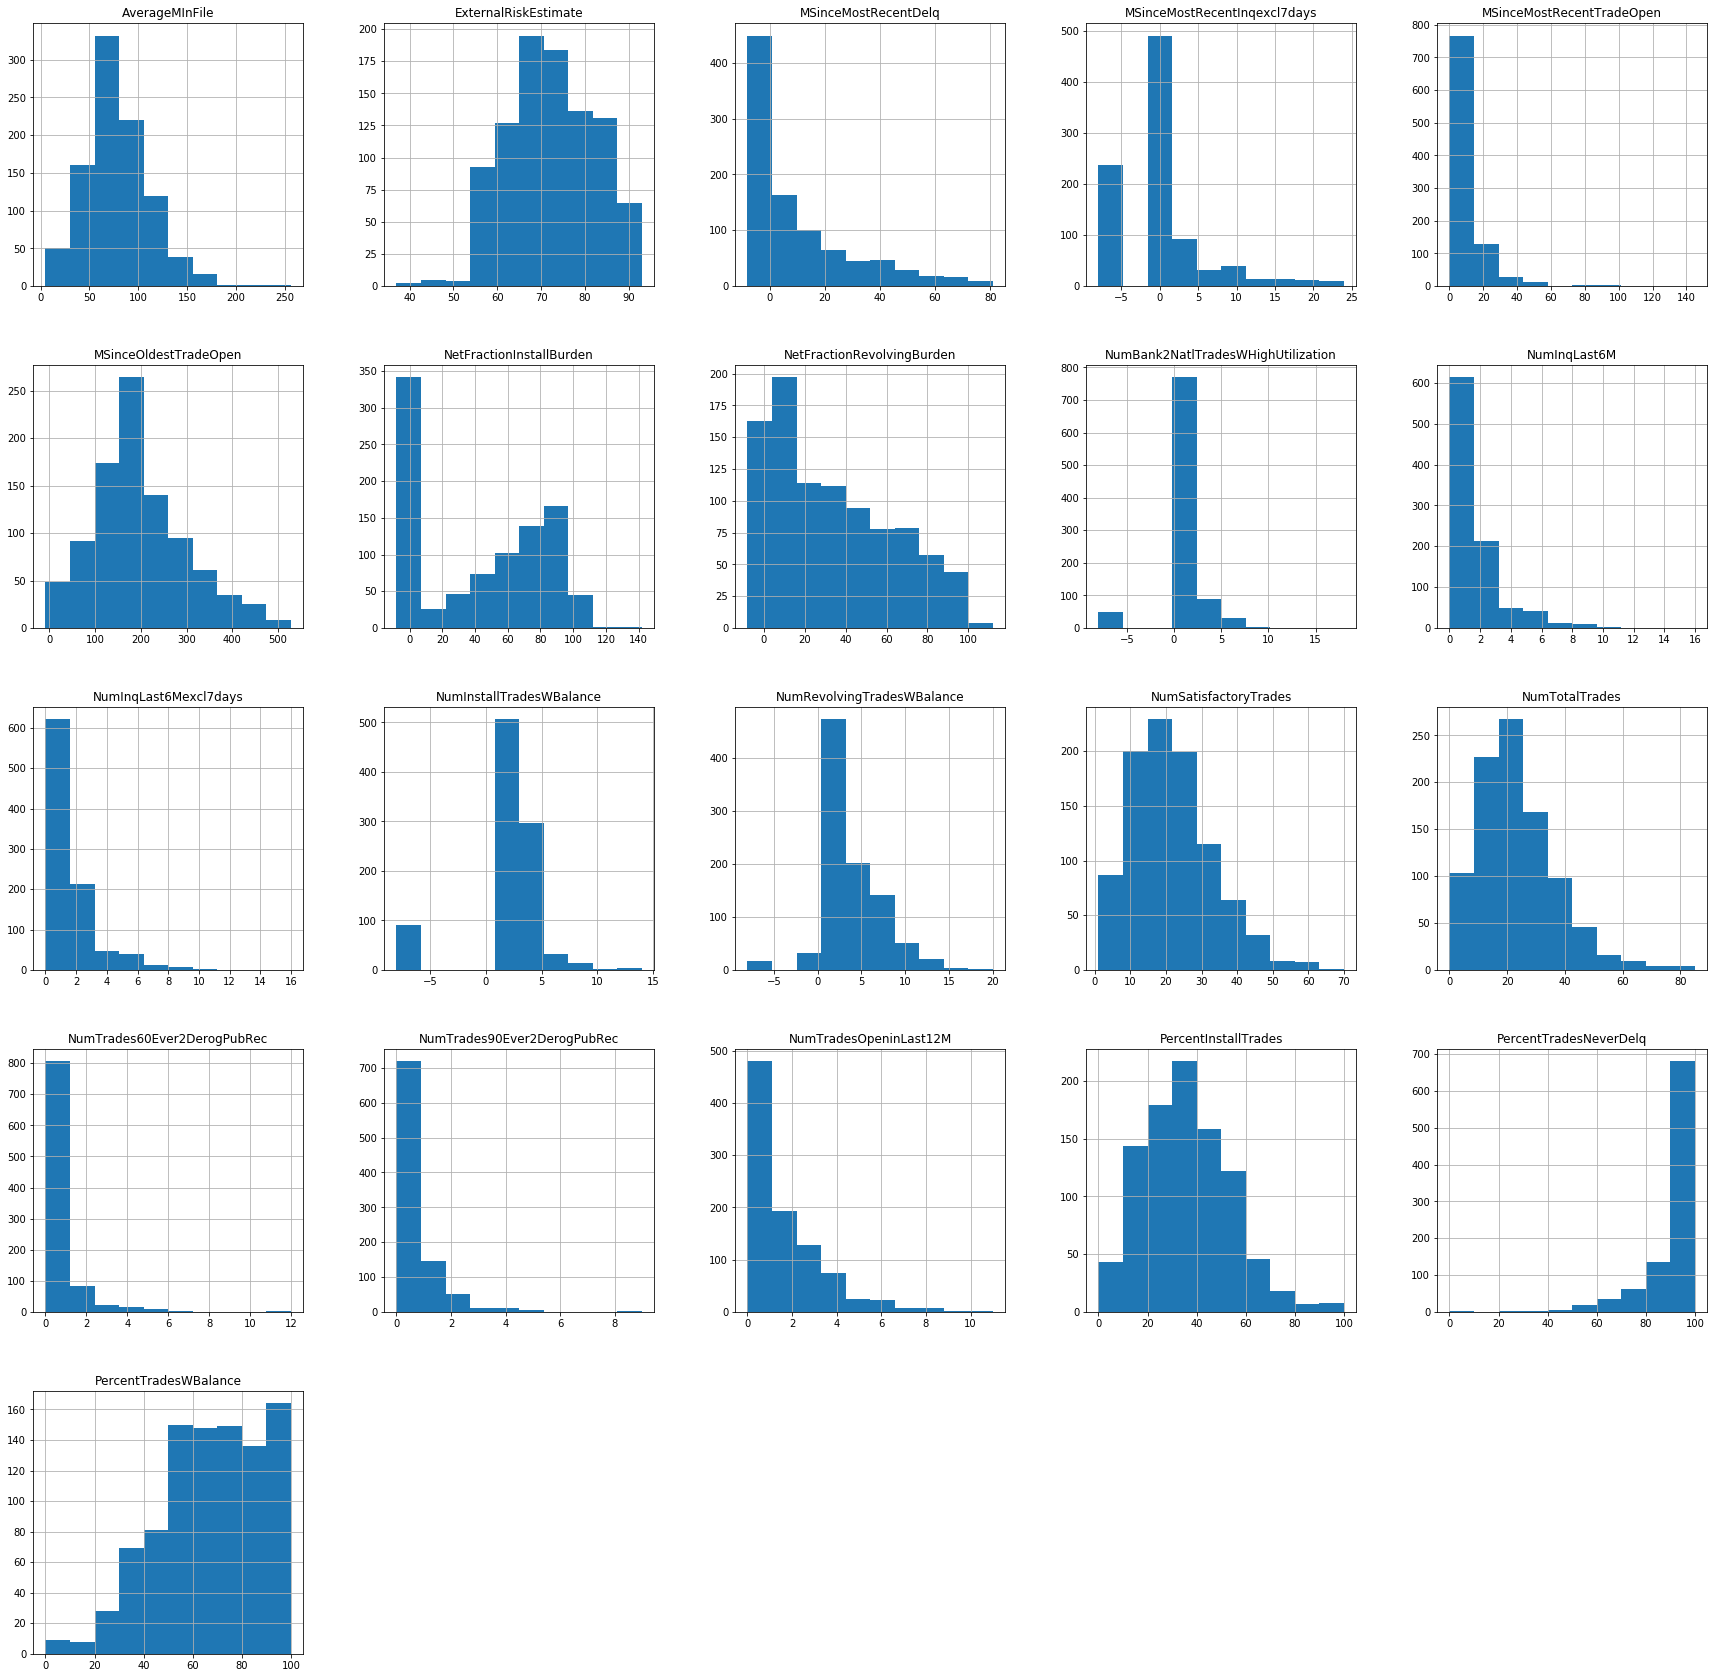

In [19]:
df_clean[continuous_columns].hist(figsize=(30,30))
plt.savefig('continuous_histo_1-1.pdf')

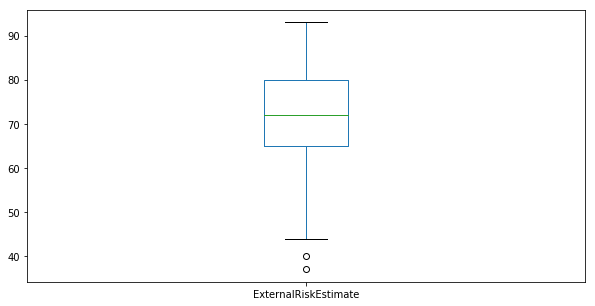

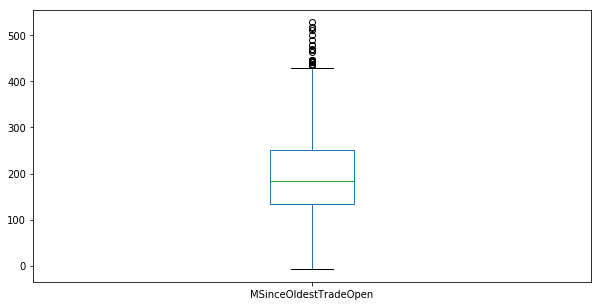

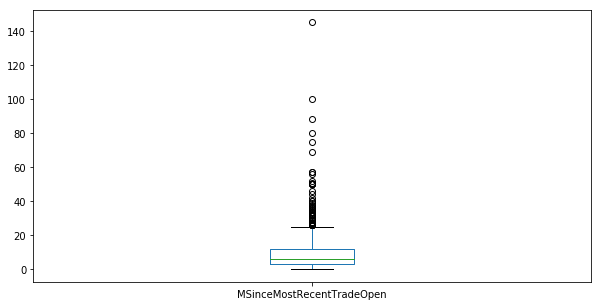

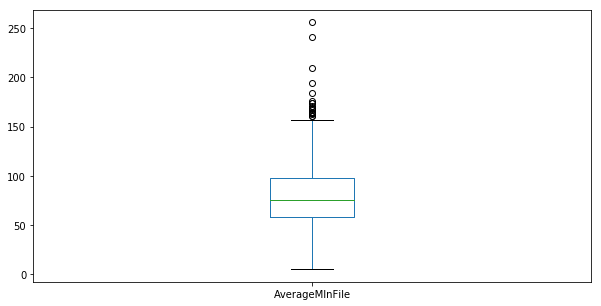

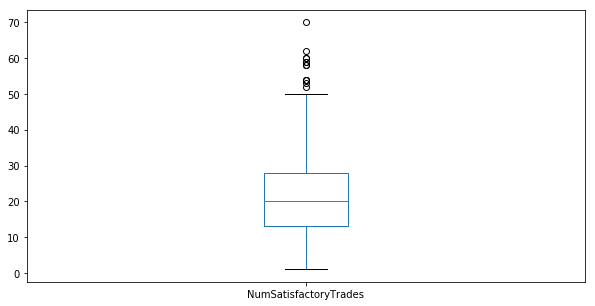

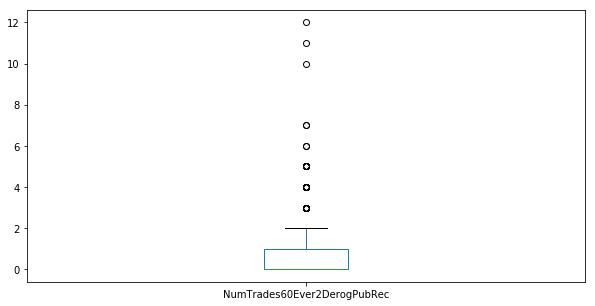

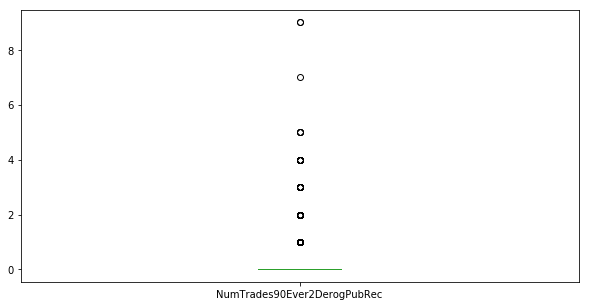

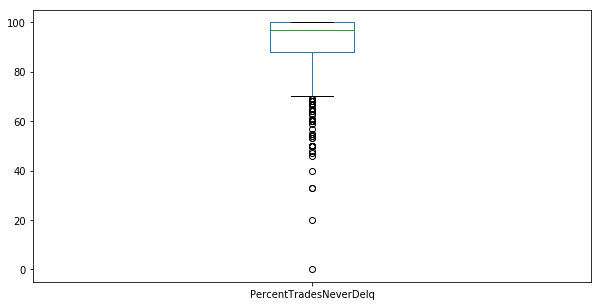

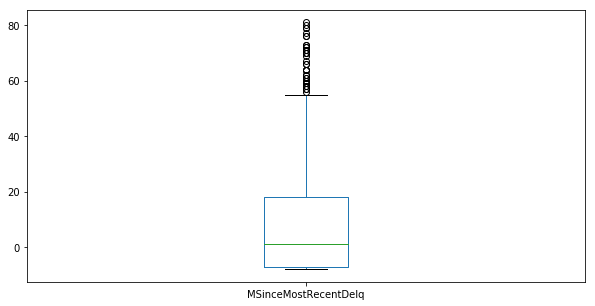

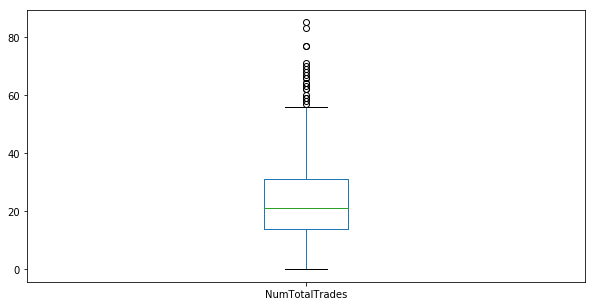

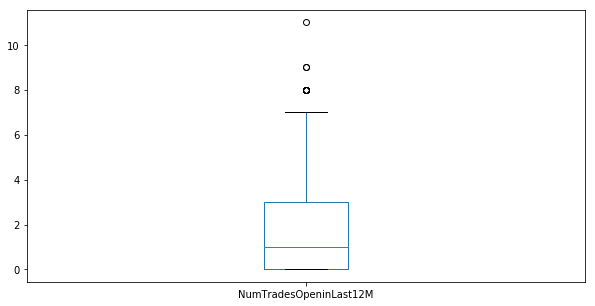

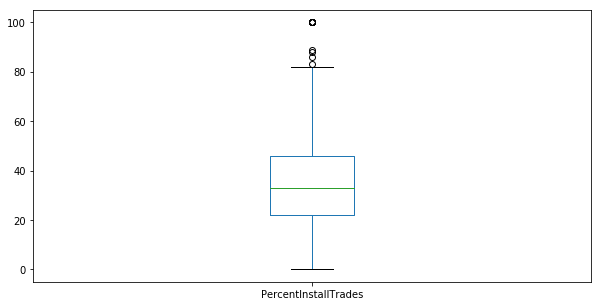

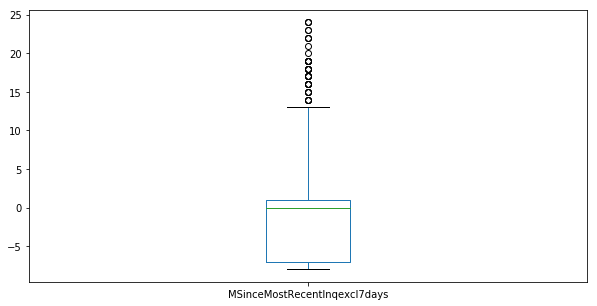

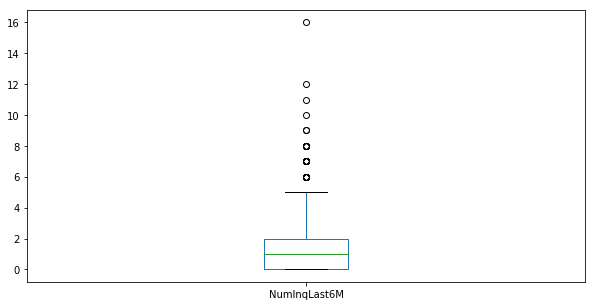

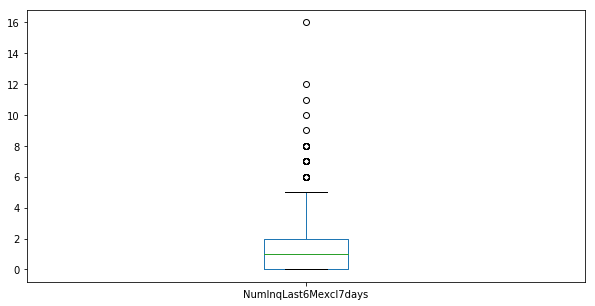

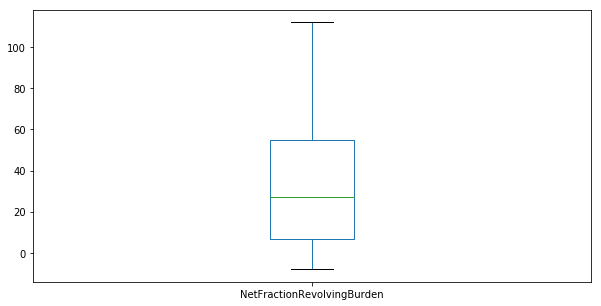

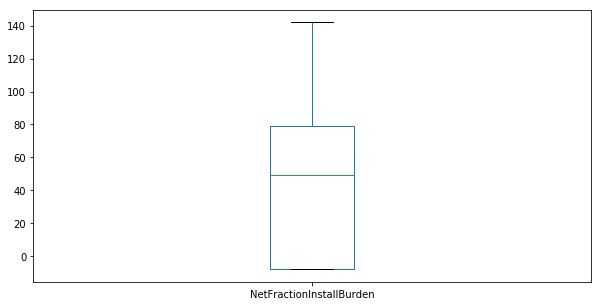

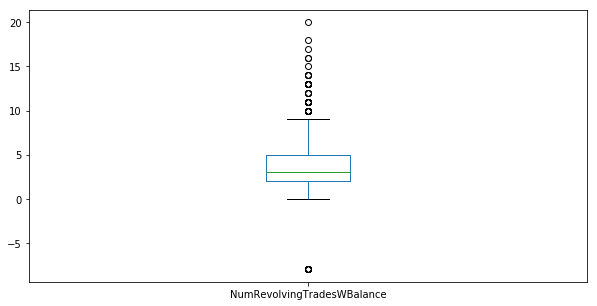

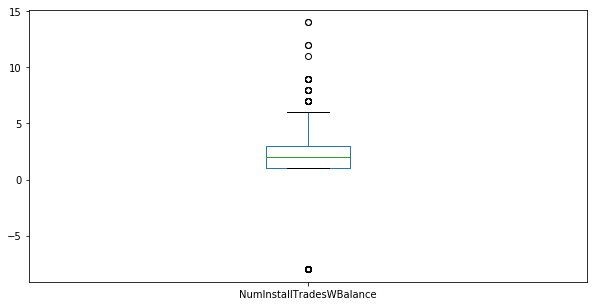

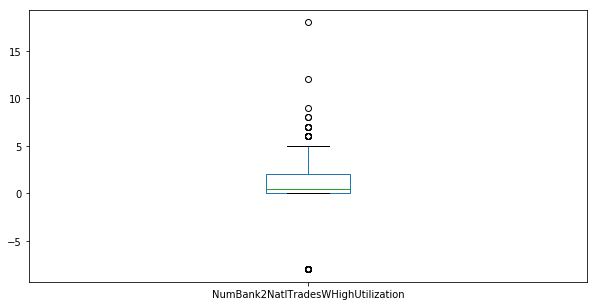

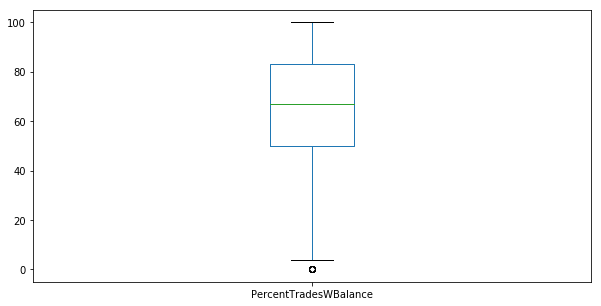

In [20]:
pp = PdfPages('continuous_boxplots_1-1.pdf')

for col in continuous_columns:
    f = df_clean[col].plot(kind='box', figsize=(10,5))
    pp.savefig(f.get_figure())
    plt.show()

pp.close()

#### Categorical features

For categorical features we plot bar charts and save to a pdf file:

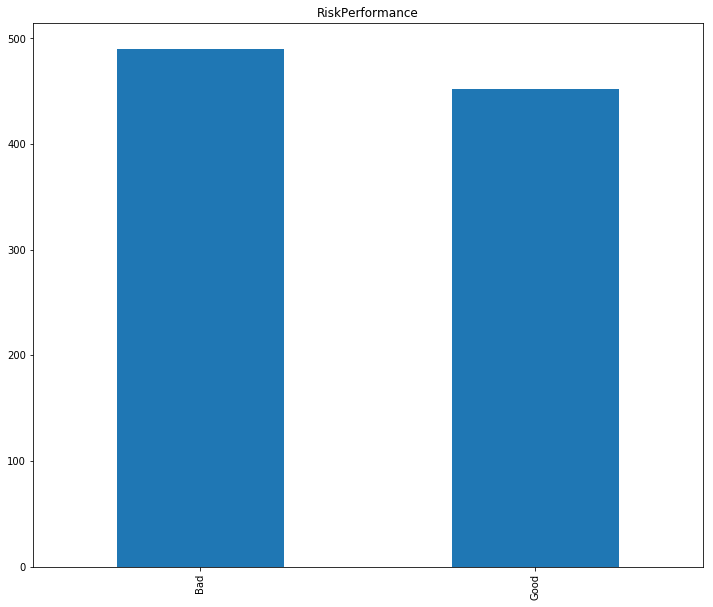

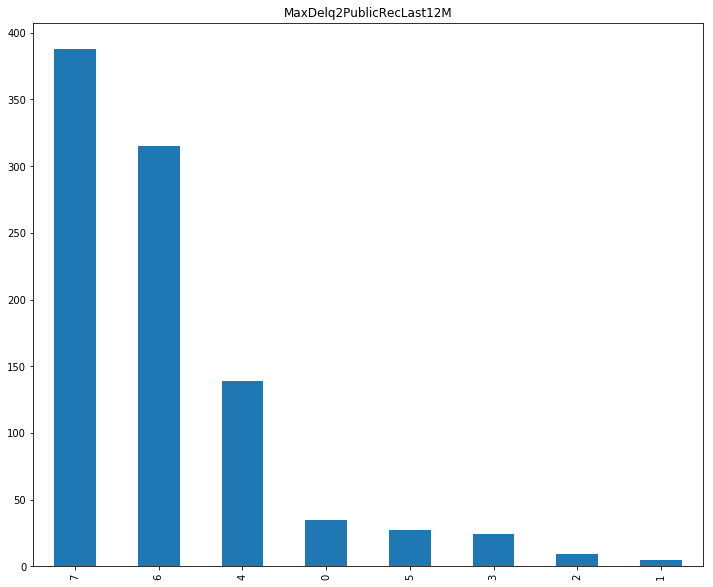

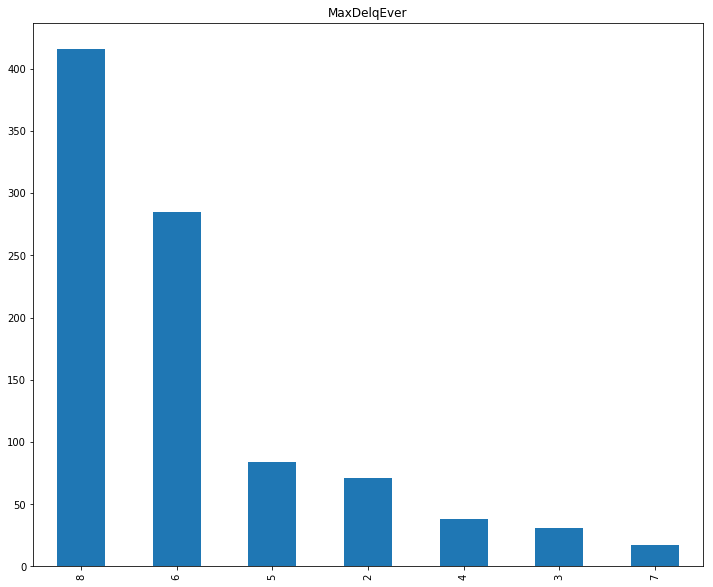

In [22]:
pp = PdfPages('categorical_barcharts_1-1.pdf')

for column in categorical_columns:
    f = df_clean[column].value_counts().plot(kind='bar', title=column, figsize=(12,10))
    pp.savefig(f.get_figure())
    plt.show()

pp.close()

### Initial findings discussion
The discussion is provided in the pdf file **dqreport.pdf**.

## Data Quality Plan
### Data quality issues

An initial overview of the reported issues is contained in the **dqreport.pdf**:

- **MSinceOldestTradeOpen**, **MSinceMostRecentDelq**, **MSinceMostRecentInqexcl7days**, **NetFractionRevolvingBurden**, **NetFractionInstallBurden**, **NumRevolvingTradesWBalance**, **NumInstallTradesWBalance**, **NumBank2NatlTradesWHighUtilization** have negative minimum values
- **NumTrades60Ever2DerogPubRec** and **NumTrades90Ever2DerogPubRec** have zeros in more than 75% observations
- **NumTradesOpeninLast12M** has values below 1 in 50% of observations
- **NumInqLast6M** and **NumInqLast6Mexcl7days** have 25% of zeros and seem to be identical features.
- the outliers in the box plots should be further investigated

### Further standard checks
#### Irregular cardinality 
Since categorical features could be affected by same values spelled differently or inconsistencies, we check for irregular cardinality.

In [23]:
print("Unique values for:\n- RiskPerformance:", pd.unique(df_clean.RiskPerformance.ravel()))
print("Unique values for:\n- MaxDelq2PublicRecLast12M:", pd.unique(df_clean.MaxDelq2PublicRecLast12M.ravel()))
print("Unique values for:\n- MaxDelqEver:", pd.unique(df_clean.MaxDelqEver.ravel()))

Unique values for:
- RiskPerformance: ['Good' 'Bad']
Unique values for:
- MaxDelq2PublicRecLast12M: [6 4 7 0 5 3 2 1]
Unique values for:
- MaxDelqEver: [6 8 5 3 4 7 2]


#### Null values
No inconsistencies nor wrong spelled values are found in categorical features.
We now check for the presence of 'null' values in each feature column:

In [24]:
# Check whether there are null values in the data where values would be expected
df_clean.isnull().sum()

RiskPerformance                       0
ExternalRiskEstimate                  0
MSinceOldestTradeOpen                 0
MSinceMostRecentTradeOpen             0
AverageMInFile                        0
NumSatisfactoryTrades                 0
NumTrades60Ever2DerogPubRec           0
NumTrades90Ever2DerogPubRec           0
PercentTradesNeverDelq                0
MSinceMostRecentDelq                  0
MaxDelq2PublicRecLast12M              0
MaxDelqEver                           0
NumTotalTrades                        0
NumTradesOpeninLast12M                0
PercentInstallTrades                  0
MSinceMostRecentInqexcl7days          0
NumInqLast6M                          0
NumInqLast6Mexcl7days                 0
NetFractionRevolvingBurden            0
NetFractionInstallBurden              0
NumRevolvingTradesWBalance            0
NumInstallTradesWBalance              0
NumBank2NatlTradesWHighUtilization    0
PercentTradesWBalance                 0
dtype: int64

No null values are present in any feature column.

No other problems are identified.

### Negative special values
We now analyze the frequencies of negative values in each feature affected by the issue.

In [25]:
# Print all relative frequencies for features affected by special values
# re-assign temp_df each time
# use format method to show percentages

print("Frequency of negative values for:\n")
temp_df = df_clean[df_clean['MSinceOldestTradeOpen'] < 0]
freq = temp_df.MSinceOldestTradeOpen.count()/df_clean.MSinceOldestTradeOpen.count()*100
print("- MSinceOldestTradeOpen:", "{0:.03f}%".format(freq))

temp_df = df_clean[df_clean['MSinceMostRecentDelq'] < 0]
freq = temp_df.MSinceMostRecentDelq.count()/df_clean.MSinceMostRecentDelq.count()*100
print("- MSinceMostRecentDelq:", "{0:.03f}%".format(freq))

temp_df = df_clean[df_clean['MSinceMostRecentInqexcl7days'] < 0]
freq = temp_df.MSinceMostRecentInqexcl7days.count()/df_clean.MSinceMostRecentInqexcl7days.count()*100
print("- MSinceMostRecentInqexcl7days:", "{0:.03f}%".format(freq))

temp_df = df_clean[df_clean['NetFractionRevolvingBurden'] < 0]
freq = temp_df.NetFractionRevolvingBurden.count()/df_clean.NetFractionRevolvingBurden.count()*100
print("- NetFractionRevolvingBurden:", "{0:.03f}%".format(freq))

temp_df = df_clean[df_clean['NetFractionInstallBurden'] < 0]
freq = temp_df.NetFractionInstallBurden.count()/df_clean.NetFractionInstallBurden.count()*100
print("- NetFractionInstallBurden:", "{0:.03f}%".format(freq))

temp_df = df_clean[df_clean['NumRevolvingTradesWBalance'] < 0]
freq = temp_df.NumRevolvingTradesWBalance.count()/df_clean.NumRevolvingTradesWBalance.count()*100
print("- NumRevolvingTradesWBalance:", "{0:.03f}%".format(freq))

temp_df = df_clean[df_clean['NumInstallTradesWBalance'] < 0]
freq = temp_df.NumInstallTradesWBalance.count()/df_clean.NumInstallTradesWBalance.count()*100
print("- NumInstallTradesWBalance:", "{0:.03f}%".format(freq))

temp_df = df_clean[df_clean['NumBank2NatlTradesWHighUtilization'] < 0]
freq = temp_df.NumBank2NatlTradesWHighUtilization.count()/df_clean.NumBank2NatlTradesWHighUtilization.count()*100
print("- NumBank2NatlTradesWHighUtilization:", "{0:.03f}%".format(freq))

Frequency of negative values for:

- MSinceOldestTradeOpen: 2.442%
- MSinceMostRecentDelq: 47.346%
- MSinceMostRecentInqexcl7days: 25.265%
- NetFractionRevolvingBurden: 2.229%
- NetFractionInstallBurden: 35.138%
- NumRevolvingTradesWBalance: 1.699%
- NumInstallTradesWBalance: 9.554%
- NumBank2NatlTradesWHighUtilization: 5.096%


Features showing a high frequency of negative values should be dropped as they are not useful for our analysis. In particular, one feature is affected by a very high level of negative/special values:

- **MSinceMostRecentDelq**

The features **NetFractionInstallBurden** and **MSinceMostRecentInqexcl7days** contain more than a quarter of observations that are not applicable/not available. We decide not to drop them as we would lost the other 75% of data in that case.
Therefore, we perform imputation: we set their negative values to zeros in order to "neuter" the possible distortion effect of unavailable information.

For all the other features affected by a relatively low frequency of negative values, we proceed to impute zeros as well.

In [27]:
# Drop selected feature
# create updated dataframe
df_clean = df_clean.drop('MSinceMostRecentDelq', 1)
df_clean.shape

KeyError: "['MSinceMostRecentDelq'] not found in axis"

#### MSinceOldestTradeOpen

In [31]:
# Replace negative values with zeros
df_clean['MSinceOldestTradeOpen'] = df_clean['MSinceOldestTradeOpen'].replace(-8, 0)

# Check if imputation has been successful
temp_df = df_clean[df_clean['MSinceOldestTradeOpen'] < 0]
if temp_df.MSinceOldestTradeOpen.count() == 0:
    print("Imputation successful.")
else:
    print("Error! Negative values still present.")

Imputation successful.


#### MSinceMostRecentInqexcl7days

In [32]:
# Replace negative values with zeros
# This feature has -7 and -8 negative levels
df_clean['MSinceMostRecentInqexcl7days'] = df_clean['MSinceMostRecentInqexcl7days'].replace(-8, 0)
df_clean['MSinceMostRecentInqexcl7days'] = df_clean['MSinceMostRecentInqexcl7days'].replace(-7, 0)

# Check if imputation has been successful
temp_df = df_clean[df_clean['MSinceMostRecentInqexcl7days'] < 0]
if temp_df.MSinceMostRecentInqexcl7days.count() == 0:
    print("Imputation successful.")
else:
    print("Error! Negative values still present.")

Imputation successful.


#### NetFractionRevolvingBurden

In [33]:
# Replace negative values with zeros
df_clean['NetFractionRevolvingBurden'] = df_clean['NetFractionRevolvingBurden'].replace(-8, 0)

# Check if imputation has been successful
temp_df = df_clean[df_clean['NetFractionRevolvingBurden'] < 0]
if temp_df.NetFractionRevolvingBurden.count() == 0:
    print("Imputation successful.")
else:
    print("Error! Negative values still present.")

Imputation successful.


#### NetFractionInstallBurden

In [34]:
# Replace negative values with zeros
df_clean['NetFractionInstallBurden'] = df_clean['NetFractionInstallBurden'].replace(-8, 0)

# Check if imputation has been successful
temp_df = df_clean[df_clean['NetFractionInstallBurden'] < 0]
if temp_df.NetFractionInstallBurden.count() == 0:
    print("Imputation successful.")
else:
    print("Error! Negative values still present.")

Imputation successful.


#### NumRevolvingTradesWBalance

In [35]:
# Replace negative values with zeros
df_clean['NumRevolvingTradesWBalance'] = df_clean['NumRevolvingTradesWBalance'].replace(-8, 0)

# Check if imputation has been successful
temp_df = df_clean[df_clean['NumRevolvingTradesWBalance'] < 0]
if temp_df.NumRevolvingTradesWBalance.count() == 0:
    print("Imputation successful.")
else:
    print("Error! Negative values still present.")

Imputation successful.


#### NumInstallTradesWBalance

In [36]:
# Replace negative values with zeros
df_clean['NumInstallTradesWBalance'] = df_clean['NumInstallTradesWBalance'].replace(-8, 0)

# Check if imputation has been successful
temp_df = df_clean[df_clean['NumInstallTradesWBalance'] < 0]
if temp_df.NumInstallTradesWBalance.count() == 0:
    print("Imputation successful.")
else:
    print("Error! Negative values still present.")

Imputation successful.


#### NumBank2NatlTradesWHighUtilization

In [37]:
# Replace negative values with zeros
df_clean['NumBank2NatlTradesWHighUtilization'] = df_clean['NumBank2NatlTradesWHighUtilization'].replace(-8, 0)

# Check if imputation has been successful
temp_df = df_clean[df_clean['NumBank2NatlTradesWHighUtilization'] < 0]
if temp_df.NumBank2NatlTradesWHighUtilization.count() == 0:
    print("Imputation successful.")
else:
    print("Error! Negative values still present.")

Imputation successful.


#### Other features
We decide to leave the other features as they are, as we have no further information available; we opt for a conservative approach.

### Summary of Data Quality Plan

| Feature                                    | Data Quality Issue    | Handling Strategy |
|--------------------------------------------|-----------------------|-------------------|
| **MSinceOldestTradeOpen**                  | negative values (2%)  | imputation        |
| **MSinceMostRecentInqexcl7days**           | negative values (25 %)| imputation        |
| **NetFractionRevolvingBurden**             | negative values (2%)  | imputation        |
| **NetFractionInstallBurden**               | negative values (35%) | imputation        |
| **NumRevolvingTradesWBalance**             | negative values (2%)  | imputation        |
| **NumInstallTradesWBalance**               | negative values (10%) | imputation        |
| **NumBank2NatlTradesWHighUtilization**     | negative values (5%)  | imputation        |
| **MSinceMostRecentDelq**                   | negative values (47%) | drop feature      |
| **NumTrades60Ever2DerogPubRec**            | many 0s               | do nothing        |
| **NumTrades90Ever2DerogPubRec**            | many 0s               | do nothing        |
| **NumTradesOpeninLast12M**                 | many values in [0-1]  | do nothing        |
| **NumInqLast6M**                           | many 0s               | do nothing        |
| **NumInqLast6Mexcl7days**                  | many 0s               | do nothing        |
| **MSinceMostRecentTradeOpen**              | outliers              | do nothing        |
| **AverageMInFile**                         | outliers              | do nothing        |
| **NumSatisfactoryTrades**                  | outliers              | do nothing        |
| **NumTotalTrades**                         | outliers              | do nothing        |

We now check again the descriptive statistics of our dataset:
- continuous features have been affected by our adjustments.
- categorical features have not been adjusted as there are no critical issues.

We notice that negative levels have been successfully imputed to zeros (**min** column) and that **MSinceMostRecentDelq** has been removed from our dataset.

In [40]:
df_clean.select_dtypes(['float64', 'int64']).describe().T

,count,mean,std,min,25%,50%,75%,max
ExternalRiskEstimate,942.0,72.150743,10.039486,37.0,65.0,72.0,80.0,93.0
MSinceOldestTradeOpen,942.0,196.823779,101.320551,0.0,134.0,183.5,252.0,528.0
MSinceMostRecentTradeOpen,942.0,9.325902,11.255838,0.0,3.0,6.0,12.0,145.0
AverageMInFile,942.0,78.936306,32.789643,5.0,58.0,75.5,98.0,256.0
NumSatisfactoryTrades,942.0,21.399151,11.398674,1.0,13.0,20.0,28.0,70.0
NumTrades60Ever2DerogPubRec,942.0,0.587049,1.202354,0.0,0.0,0.0,1.0,12.0
NumTrades90Ever2DerogPubRec,942.0,0.384289,0.905109,0.0,0.0,0.0,0.0,9.0
PercentTradesNeverDelq,942.0,91.898089,12.294483,0.0,88.0,97.0,100.0,100.0
NumTotalTrades,942.0,23.289809,13.362273,0.0,14.0,21.0,31.0,85.0
NumTradesOpeninLast12M,942.0,1.817410,1.731313,0.0,0.0,1.0,3.0,11.0


In [41]:
df_clean.select_dtypes(['category']).describe().T

,count,unique,top,freq
RiskPerformance,942,2,Bad,490
MaxDelq2PublicRecLast12M,942,8,7,388
MaxDelqEver,942,7,8,416


We can then proceed to write our adjusted dataframe to a new csv file:

In [42]:
df_clean.to_csv('CreditRisk-18202941_cleaned_updated.csv', index=False)

## Exploring relationships between feature pairs

### Subset selection
We select a subset of features that we consider promising and then we proceed to plot pairwise feature interactions.
We choose to analyze the following features:
- **continuous**
    - AverageMInFile
    - ExternalRiskEstimate
    - MSinceMostRecentTradeOpen
    - MSinceOldestTradeOpen
    - NumberSatisfactoryTrades
    - NumTotalTrades
    - NumTrades90Ever2DerogPubRec
    - NumTradesOpeninLast12M
    - PercentTradesNeverDelq

- **categorical**
    - RiskPerformance
    - MaxDelq2PublicRecLast12M
    - MaxDelqEver

### Continuous-continuous plots

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 <a list of 9 Text xticklabel objects>)

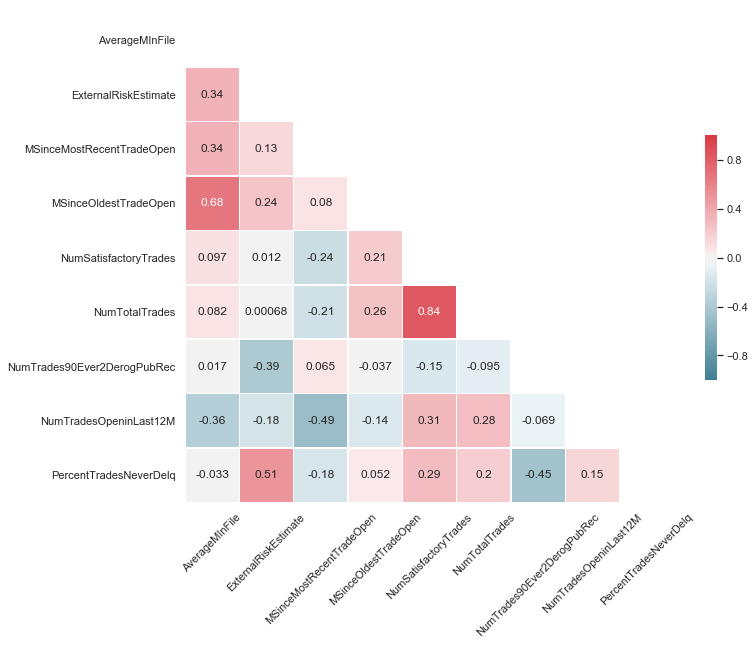

In [43]:
# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")

# Select columns containing continuous data
continuous_columns = df_clean[['AverageMInFile',\
                               'ExternalRiskEstimate',\
                               'MSinceMostRecentTradeOpen',\
                              'MSinceOldestTradeOpen',\
                              'NumSatisfactoryTrades',\
                              'NumTotalTrades',\
                              'NumTrades90Ever2DerogPubRec',\
                              'NumTradesOpeninLast12M',\
                              'PercentTradesNeverDelq']].columns

# Calculate correlation of all pairs of continuous features
corr = df_clean[continuous_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

Thanks to the previous correlation matrix, we are able to notice how strong is the correlation between each pair of selected features. We decide to draw scatter plots for the pairs showing correlation greater than (absolute value) 40%:
- **AverageMInFile** and **MSinceOldestTradeOpen** (+0.68)
- **ExternalRiskEstimate** and **PercentTradesNeverDelq** (+0.51)
- **MSinceMostRecentTradeOpen** and **NumTradesOpeninLast12M** (-0.49)
- **NumSatisfactoryTrades** and **NumTotalTrades** (+0.84)
- **NumTrades90Ever2DerogPubRec** and **PercentTradesNeverDelq** (-0.45)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

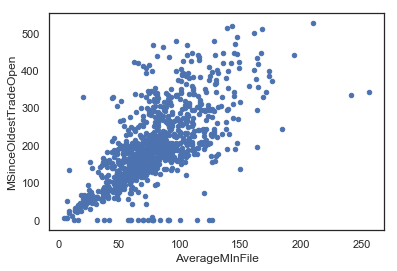

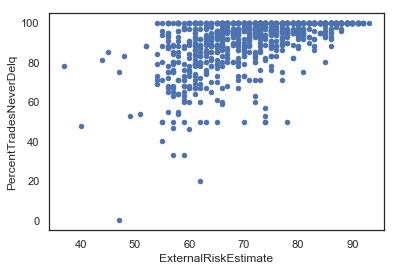

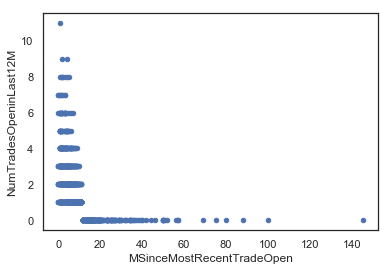

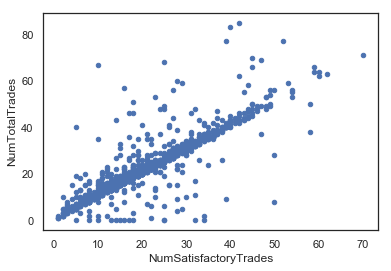

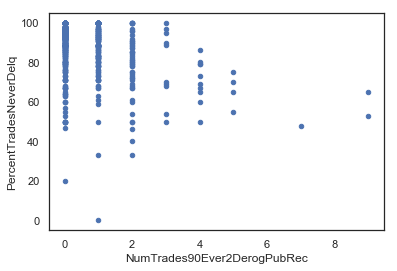

In [44]:
df_clean.plot(kind='scatter', x='AverageMInFile', y='MSinceOldestTradeOpen')
df_clean.plot(kind='scatter', x='ExternalRiskEstimate', y='PercentTradesNeverDelq')
df_clean.plot(kind='scatter', x='MSinceMostRecentTradeOpen', y='NumTradesOpeninLast12M')
df_clean.plot(kind='scatter', x='NumSatisfactoryTrades', y='NumTotalTrades')
df_clean.plot(kind='scatter', x='NumTrades90Ever2DerogPubRec', y='PercentTradesNeverDelq')


From the scatter plots, we can notice that:
- the correlation between **AverageMInFile** and **MSinceOldestTradeOpen** (first plot) is close to linear and positive, as we would expect: the longer a trade line is in the credit bureau file, the larger is the number of months passed since the oldest trade was opened.
- the correlation between **NumSatisfactoryTrades** and **NumTotalTrades** (fourth plot) is quite clearly linear and positive. A higher count of trades for each credit applicant is likely to imply a high portion of satisfactory trade lines.
- the remaining scatter plots show some form of correlation, but we cannot say much in terms of linearity.

### Categorical-categorical plots

(0, 100)

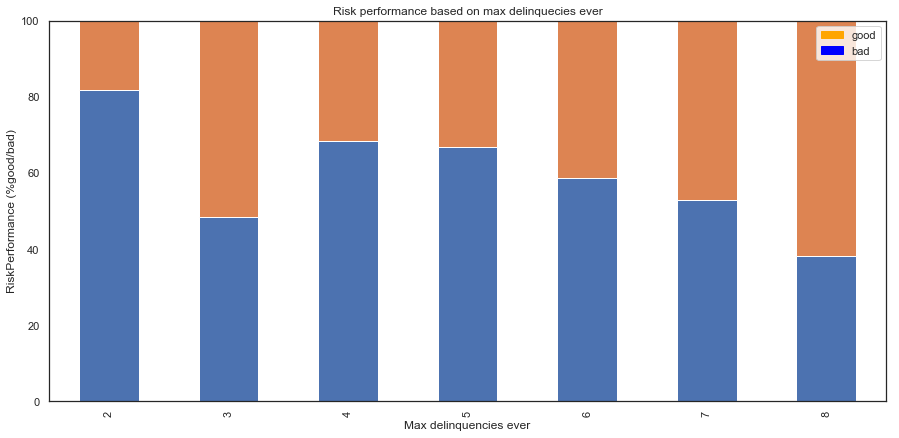

In [45]:
#Using code from the module lab
maxdelq = pd.unique(df_clean.MaxDelqEver.ravel())

df_clean['percent'] = 0

for i in maxdelq:
    count = 1 / df_clean[df_clean.MaxDelqEver == i].count()['RiskPerformance']
    index_list = df_clean[df_clean['MaxDelqEver'] == i].index.tolist()
    for ind in index_list:
        df_clean.loc[ind, 'percent'] = count * 100
        
group = df_clean[['percent','MaxDelqEver','RiskPerformance']].groupby(['MaxDelqEver','RiskPerformance']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Risk performance based on max delinquecies ever", figsize=(15,7))

red_patch = mpatches.Patch(color='orange', label='good')
blue_patch = mpatches.Patch(color='blue', label='bad')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

my_plot.set_xlabel("Max delinquencies ever")
my_plot.set_ylabel("RiskPerformance (%good/bad)")
my_plot.set_ylim([0,100])

(0, 100)

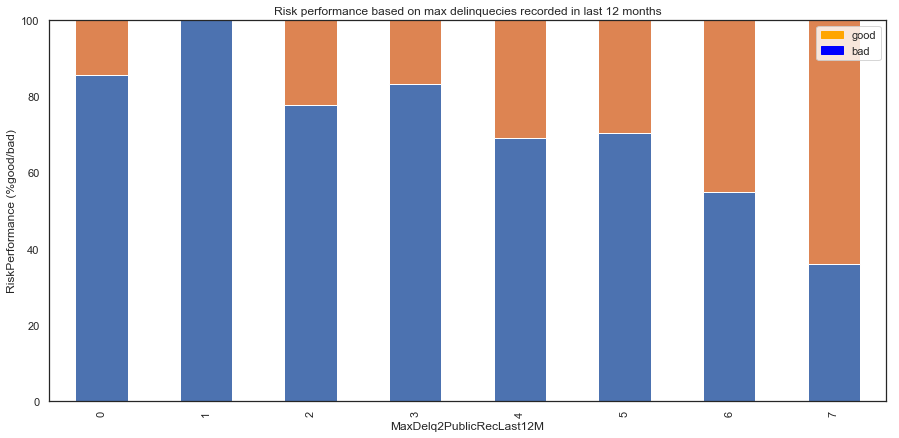

In [46]:
# Using code from the module lab
maxdelq = pd.unique(df_clean.MaxDelq2PublicRecLast12M.ravel())

df_clean['percent'] = 0

for i in maxdelq:
    count = 1 / df_clean[df_clean.MaxDelq2PublicRecLast12M == i].count()['RiskPerformance']
    index_list = df_clean[df_clean['MaxDelq2PublicRecLast12M'] == i].index.tolist()
    for ind in index_list:
        df_clean.loc[ind, 'percent'] = count * 100
        
group = df_clean[['percent','MaxDelq2PublicRecLast12M','RiskPerformance']].groupby(['MaxDelq2PublicRecLast12M','RiskPerformance']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Risk performance based on max delinquecies recorded in last 12 months", figsize=(15,7))

red_patch = mpatches.Patch(color='orange', label='good')
blue_patch = mpatches.Patch(color='blue', label='bad')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

my_plot.set_xlabel("MaxDelq2PublicRecLast12M")
my_plot.set_ylabel("RiskPerformance (%good/bad)")
my_plot.set_ylim([0,100])

In [47]:
# Previous cell has created a new 'percent' column
df_clean.head(5)

# Remove 'percent' column created in previous cell
df_clean = df_clean.drop('percent', 1)

The two categorical-categorical bar-plots show the percentage of 'good' and 'bad' credit applicants for each level of maximum delinquency recorded.
We briefly discuss our findings in the following points:

- **Risk performance based on max delinquency ever**
    - In presence of a 'derogatory comment' (level 2 on x-axis), most of the credit applicants fall under the 'bad' category (around 80%)
    - We find perplexing that for level 3 (120+ delinquency) the percentage of 'good' and 'bad' are almost equal
    - As we might expect, the percentage of 'bad' applicants decreases as the days of recorded delinquency decrease as well (levels 4,5,6)
    - We cannot say anything about level 7 (unknown delinquency) but portion of 'good' and 'bad' applicants are almost equal
    - It is puzzling that at level 8 (never delinquent) there is still a portion of 'bad' applicants (~35%) <br><br>
- **Risk performance based on max delinquency over last 12 months**
    - **Considerations exposed above apply also here**. We notice that in this case, for delinquencies of 120+ days, all applicants are labeled as 'bad' (as we would expect). It is somewhat puzzling that portion of 'bad' is still higher at level 3 (60 days) than at level 2 (90 days) - we would expect the opposite.

### Continuous-categorical plots

<Figure size 432x288 with 0 Axes>

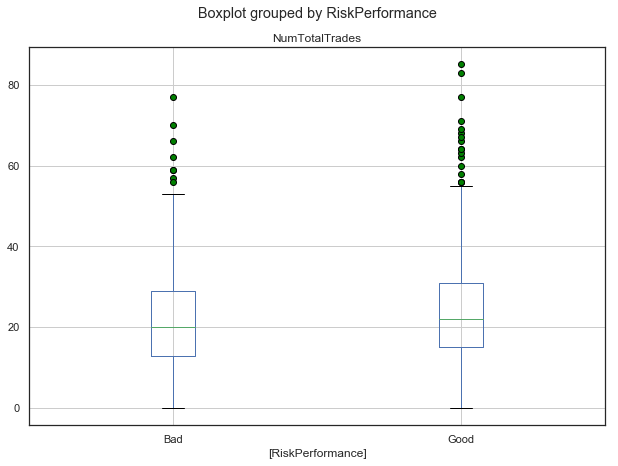

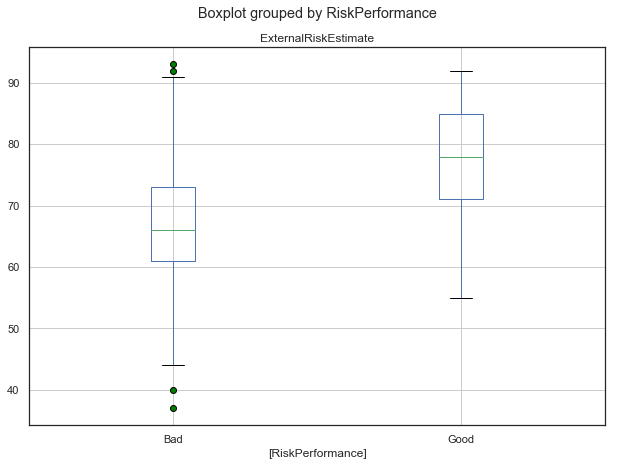

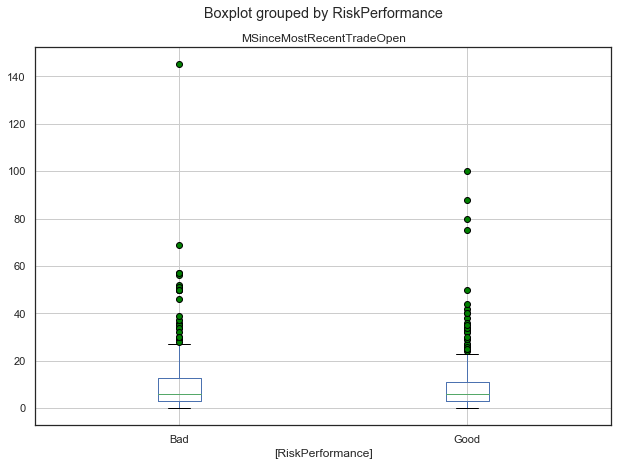

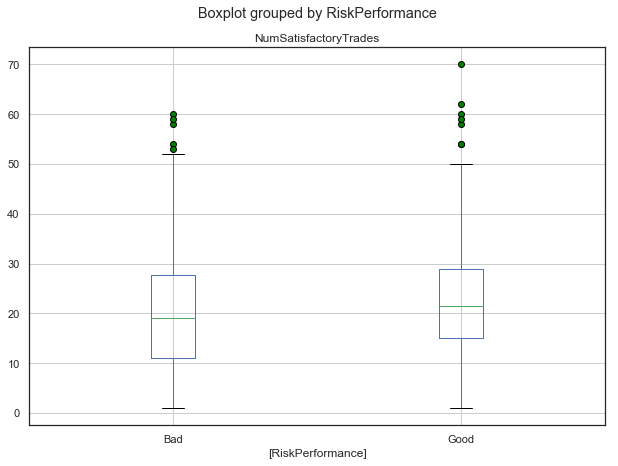

In [48]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df_clean.boxplot(column=['NumTotalTrades'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7))
df_clean.boxplot(column=['ExternalRiskEstimate'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7))
df_clean.boxplot(column=['MSinceMostRecentTradeOpen'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7))
df_clean.boxplot(column=['NumSatisfactoryTrades'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a14bda7b8>]],
      dtype=object)

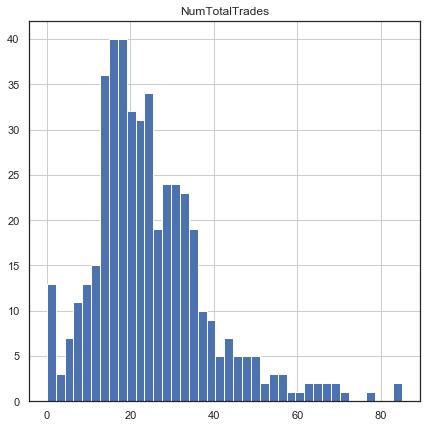

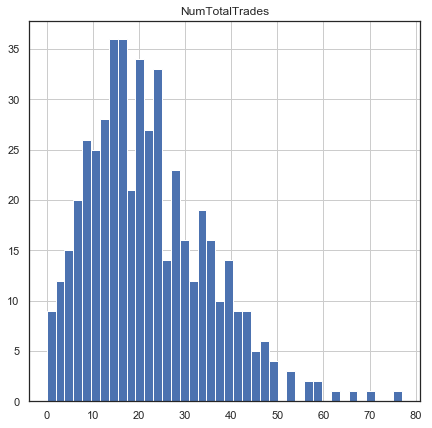

In [49]:
df_clean[df_clean['RiskPerformance'] == 'Good'][['NumTotalTrades']].hist(figsize=(7,7), bins=40)
df_clean[df_clean['RiskPerformance'] == 'Bad'][['NumTotalTrades']].hist(figsize=(7,7), bins=40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a149a5be0>]],
      dtype=object)

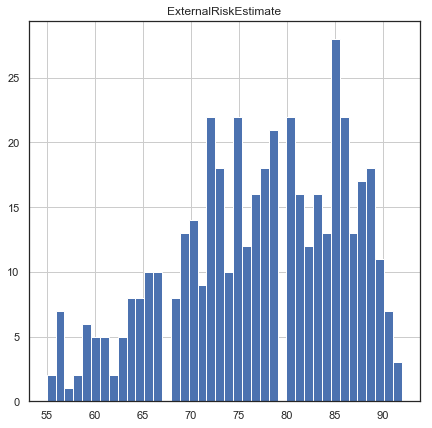

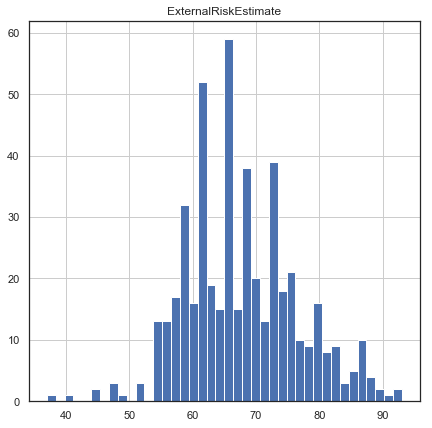

In [50]:
df_clean[df_clean['RiskPerformance'] == 'Good'][['ExternalRiskEstimate']].hist(figsize=(7,7), bins=40)
df_clean[df_clean['RiskPerformance'] == 'Bad'][['ExternalRiskEstimate']].hist(figsize=(7,7), bins=40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a14997240>]],
      dtype=object)

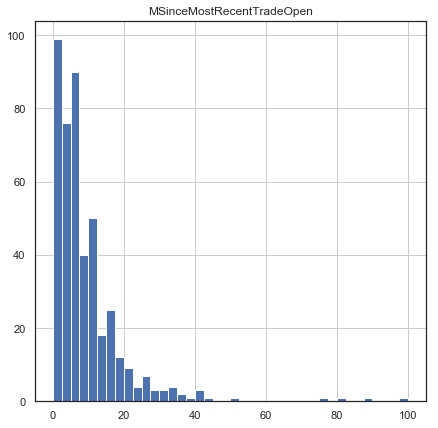

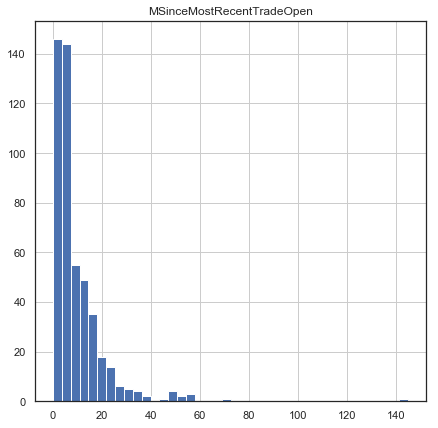

In [51]:
df_clean[df_clean['RiskPerformance'] == 'Good'][['MSinceMostRecentTradeOpen']].hist(figsize=(7,7), bins=40)
df_clean[df_clean['RiskPerformance'] == 'Bad'][['MSinceMostRecentTradeOpen']].hist(figsize=(7,7), bins=40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x105193358>]],
      dtype=object)

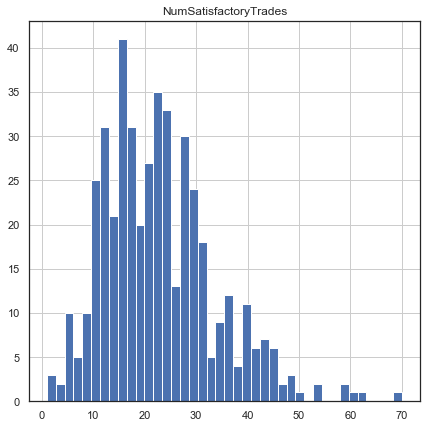

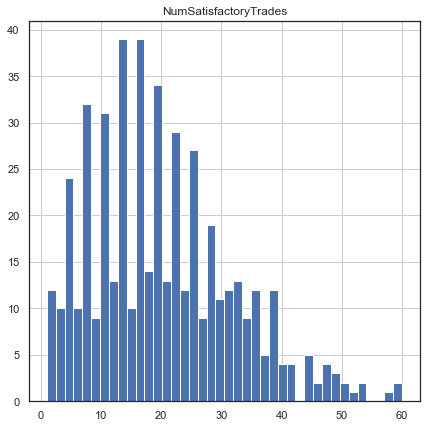

In [52]:
df_clean[df_clean['RiskPerformance'] == 'Good'][['NumSatisfactoryTrades']].hist(figsize=(7,7), bins=40)
df_clean[df_clean['RiskPerformance'] == 'Bad'][['NumSatisfactoryTrades']].hist(figsize=(7,7), bins=40)

The entire dataset presents some difficulties in order to assess the probability of default (i.e. 'bad' category) of a single applicant.

Nevertheless, the analyzed data have some degree of consistency:
- the number of satisfactory trade lines (**NumSatisfactoryTrades**) is directly proportional to the number of total trades (**NumTotalTrades**), as expected
- the average number of monts in file (**AverageMInFile**) is directly proportional to the trade line seniority (**MSinceOldestTradeOpen**), as expected
- the older the most recent trade line (**MSinceMostRecentTradeOpen**), the higher the change of multiple trade lines opened in the last year (**NumTradesOpeninLast12M**), as expected
- a better external credit rating (**ExternalRiskEstimate**) means a higher portion of trade lines that have never been delinquent (**PercentTradesNeverDelq**), as expected

Categorical features show some flaws, though. In general, we can gather the evidence that the deeper a delinquency has resulted (in terms of days), the higher the default probability; this conclusion should be further verified because of the aforementioned categorical features' incosistencies.

In perspective of a predictive machine learning model, we suggest to consider the following features:
- ExternalRiskEstimate
- AverageMInFile
- PercentTradesNeverDelq 
- MaxDelq2PublicRecLast12M
- NumSatisfactoryTrades
- MSinceMostRecentTradeOpen
- MSinceOldestTradeOpen

## Feature transformation

### Transformation 1 - binning
**ExternalRiskEstimate** is a feature that can split in equal-width bins. The range of such feature spans between 37 and 93, so our bins will represent a value of 10 each.
The frequency in each bin will be variable.

With such transformation we are able to better compare different levels of credit risk estimates by grouping them in classes.

In [53]:
# Define bins, we consider the feature range
bins = [35, 45, 55, 65, 75, 85, 95]

# Give each bin a proper label
labels = ['35<score>=45', '45<score>=55',\
          '55<score>=65', '65<score>=75', '75<score>=85',\
          '85<score>=95']

# Create 'binned' feature
df_clean['ExternalRiskEstimate-binned'] = pd.cut(df_clean['ExternalRiskEstimate'], bins = bins, labels = labels)

# Count levels in each bin
s = df_clean.groupby(pd.cut(df_clean['ExternalRiskEstimate'], bins=bins)).size()
print(s)

ExternalRiskEstimate
(35, 45]      4
(45, 55]     22
(55, 65]    247
(65, 75]    319
(75, 85]    240
(85, 95]    110
dtype: int64


### Transformation 2 - ratio
Features **NumSatisfactoryTrades** and  **NumTotalTrades** are related, as the first is a subset of the second. We can compute a ratio, indicating the portion of trade lines that have been satisfactory so far for each credit applicant.

In this way, we build a synthetic indicator that catches the portion of satisfactory trade lines over the total count of trade lines ever opened by the credit applicant.

In [54]:
# Perform division between columns
z = df_clean['NumSatisfactoryTrades']/ df_clean['NumTotalTrades']

# Add new column to dataframe
df_clean['SatisfactoryTradesRatio']= z

# Check result
df_clean.head()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MaxDelq2PublicRecLast12M,...,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,ExternalRiskEstimate-binned,SatisfactoryTradesRatio
0,Good,71,308,7,104,39,0,0,98.0,6,...,0,0,75.0,99.0,11,1,5,81.0,65<score>=75,0.975000
1,Good,75,381,15,108,20,0,0,95.0,6,...,2,2,32.0,64.0,6,4,3,77.0,65<score>=75,1.000000
2,Bad,58,216,12,86,23,0,0,88.0,4,...,1,1,84.0,0.0,7,1,5,75.0,55<score>=65,0.433962
3,Bad,73,191,17,53,19,0,0,100.0,7,...,0,0,31.0,78.0,4,3,1,54.0,65<score>=75,0.950000
4,Good,89,280,23,107,16,0,0,100.0,7,...,0,0,7.0,38.0,1,2,0,60.0,85<score>=95,1.000000


### Transformation 3 - range normalization
The feature **NumTotalTrades** can be range-normalized in order to make it work better in a prospect machine learning model.
The ultimate aim of normalization is to make feature units comparable between each other.

NB: this is a mere example, as other feature (e.g. *NumSatisfactoryTrades*) can be normalized as well.

In [55]:
# Compute normalized values with max-min method
norm =(df_clean['NumTotalTrades']-df_clean['NumTotalTrades'].min())/(df_clean['NumTotalTrades'].max()-df_clean['NumTotalTrades'].min())

# Add new column to dataframe
df_clean['NumTotalTrades_norm'] = norm

# Check result
df_clean.head()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MaxDelq2PublicRecLast12M,...,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,ExternalRiskEstimate-binned,SatisfactoryTradesRatio,NumTotalTrades_norm
0,Good,71,308,7,104,39,0,0,98.0,6,...,0,75.0,99.0,11,1,5,81.0,65<score>=75,0.975000,0.470588
1,Good,75,381,15,108,20,0,0,95.0,6,...,2,32.0,64.0,6,4,3,77.0,65<score>=75,1.000000,0.235294
2,Bad,58,216,12,86,23,0,0,88.0,4,...,1,84.0,0.0,7,1,5,75.0,55<score>=65,0.433962,0.623529
3,Bad,73,191,17,53,19,0,0,100.0,7,...,0,31.0,78.0,4,3,1,54.0,65<score>=75,0.950000,0.235294
4,Good,89,280,23,107,16,0,0,100.0,7,...,0,7.0,38.0,1,2,0,60.0,85<score>=95,1.000000,0.188235


In [56]:
# Write final version of dataframe to new csv file with proper name
df_clean.to_csv('CreditRisk-18202941_cleaned_updated_transformed.csv', index=False)